In [25]:
import pandas as pd
import numpy as np
from aeon.transformations.collection.dictionary_based import SAX


In [5]:
prices_df = pd.read_csv("../datasets/stocks/nasdaq_prices.csv", index_col=0)
prices_df.index = pd.to_datetime(prices_df.index)

# monthly returns
returns_df = (prices_df
              .pct_change()
              .dropna()
              .resample('MS')
              .agg(lambda x: (x + 1).prod() - 1)
              )
returns_df.head()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SIRI,SNPS,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.029584,0.056248,0.023189,0.018066,0.035905,-0.015724,0.048314,0.115931,-0.075561,-0.008461,...,-0.041420,0.005187,-0.010711,-0.094666,0.039992,-0.018566,0.080578,0.028484,-0.071650,0.000425
2011-02-01,0.040935,0.043873,0.027041,0.043842,0.033677,0.015768,0.000960,0.051731,0.176245,-0.068083,...,0.117284,0.021747,0.113689,-0.008714,0.050133,-0.043749,0.200051,0.076160,0.105385,0.015697
2011-03-01,-0.013307,-0.038841,-0.006960,0.033513,0.048989,-0.017887,-0.017746,-0.049300,-0.066232,0.041301,...,-0.088398,-0.002525,0.127778,0.161574,-0.029486,0.012674,0.026998,-0.073835,-0.074461,0.008684
2011-04-01,0.004649,0.011761,0.023617,0.059443,0.019723,0.038133,0.178711,0.004482,0.058140,0.063611,...,0.206061,-0.009403,0.036330,-0.005405,0.031803,0.004274,0.148550,0.064275,0.109273,0.018418
2011-05-01,-0.006569,0.032191,0.027686,0.013796,-0.044464,0.060456,0.014913,-0.116552,-0.046154,0.064908,...,0.180904,-0.001825,0.063577,0.092029,-0.006473,0.034954,-0.019255,0.025352,-0.015816,0.016851


In [32]:
n_segments_sax = 64
alphabet_size_sax = 64

sax = SAX(n_segments=n_segments_sax, alphabet_size=alphabet_size_sax)

<Axes: xlabel='Date'>

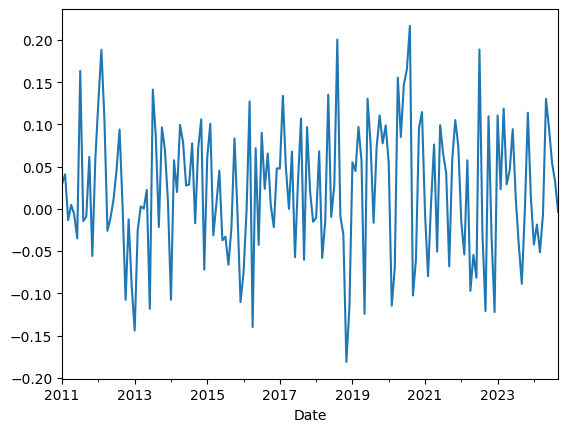

In [34]:
returns_df['AAPL'].plot()

In [33]:
enc = sax.fit_transform(np.expand_dims(returns_df['AAPL'].to_numpy(), axis=0)).squeeze()
enc

array([32, 31, 33, 32, 35, 31, 33, 30, 30, 31, 33, 33, 31, 33, 32, 32, 33,
       32, 30, 31, 32, 31, 33, 32, 33, 32, 32, 32, 31, 32, 33, 29, 33, 32,
       33, 34, 30, 35, 35, 33, 32, 33, 31, 32, 34, 31, 34, 32, 32, 30, 33,
       30, 32, 31, 33, 32, 33, 30, 33, 31, 31, 33, 33, 32])